<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Подсчёт-выручки" data-toc-modified-id="Подсчёт-выручки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подсчёт выручки</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-тарифа-&quot;Смарт&quot;" data-toc-modified-id="Анализ-тарифа-&quot;Смарт&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ тарифа "Смарт"</a></span></li><li><span><a href="#Анализ-тарифа-&quot;Ультра&quot;" data-toc-modified-id="Анализ-тарифа-&quot;Ультра&quot;-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ тарифа "Ультра"</a></span></li></ul></li><li><span><a href="#Построение-и-проверка-гипотез" data-toc-modified-id="Построение-и-проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение и проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы:-&quot;Пользователи-тарифа-&quot;Смарт&quot;-приносят-в-меньше-выручки,-чем-пользователи-тарифа-&quot;Ультра&quot;&quot;" data-toc-modified-id="Проверка-гипотезы:-&quot;Пользователи-тарифа-&quot;Смарт&quot;-приносят-в-меньше-выручки,-чем-пользователи-тарифа-&quot;Ультра&quot;&quot;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка гипотезы: "Пользователи тарифа "Смарт" приносят в меньше выручки, чем пользователи тарифа "Ультра""</a></span></li><li><span><a href="#Проверка-гипотезы:-&quot;Средняя-выручка-пользователи-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;" data-toc-modified-id="Проверка-гипотезы:-&quot;Средняя-выручка-пользователи-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотезы: "Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов"</a></span></li></ul></li><li><span><a href="#Сравнение-динамики-суммарной-месячной-выручки" data-toc-modified-id="Сравнение-динамики-суммарной-месячной-выручки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сравнение динамики суммарной месячной выручки</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Наша задача состоит в том, чтобы сделать предварительный анализ тарифов на небольшой выборке клиентов. У нас есть выборка из 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv("/datasets/calls.csv")
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
internet_sessions = pd.read_csv("/datasets/internet.csv", index_col = 0)
internet_sessions.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
internet_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
internet_sessions.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [8]:
messages = pd.read_csv("/datasets/messages.csv")
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs = pd.read_csv("/datasets/tariffs.csv")
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users = pd.read_csv("/datasets/users.csv")
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

Данные в таблицах выглядят на первый взгляд очень хорошо. Нету явных, необъяснимых пропусков. Изменить тип данных можно только в столбцах duration и mb_used в таблицах calls и internet_sessions на int, так как нас не интересуют части мегабайта или минуты, которые потратил клиент, однако так как у нас нет адекватного метода округления вверх, то при округлении вниз и прибавлении единицы мы получим искажение данных, так как есть значения с нулевой дробной частью, поэтому и эти столбцы оставим в покое. Единственное, что смущает - столбец "unnamed: 0", но его можно удалить, так как он дублирует индекс таблицы "internet_sessions". Также исходя из метрик describe() мы видим, что каких-то аномальных значений тоже не наблюдается.

## Предобработка данных

### Обработка дубликатов

In [13]:
print(calls.duplicated().sum())
print(internet_sessions.duplicated().sum())
print(messages.duplicated().sum())

0
0
0


Как оказалось и дубликатов тоже нет.

### Изменение типов данных

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y-%m-%d')
internet_sessions['session_date'] = pd.to_datetime(internet_sessions['session_date'], format ='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
print(calls['call_date'].dtype)
print(internet_sessions['session_date'].dtype)
print(messages['message_date'].dtype)
internet_sessions

datetime64[ns]
datetime64[ns]
datetime64[ns]


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Изменили тип данных даты на собственно тип 'datetime'.

***Проверка нулей в интернет сессиях***

In [15]:
zero_sessions = internet_sessions.query("mb_used == 0")['id'].count()
zero_sessions

19598

**Вывод**

Интернет-сессий с нулевой продолжительностью достаточно много (примерно 2/15) обычно оперотор не учитывает сессии, когда клиент заходит на сайт оператора. Дальше мы покажем, что в тарифе "Смарт" пользователям обычно нехватает интернет трафика, это даёт нам основания полагать, что эти клиенты достаточно часто заходят на сайты оператора. Значит это не ошибочные сессии и их надо оставить.

### Подготовка данных

In [16]:
calls['month'] = calls['call_date'].dt.month
internet_sessions['month'] = internet_sessions['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


Создали столбцы для группировки по месяцам.

In [17]:
calls_pivot_table = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count','sum'])
internet_sessions_pivot_table = internet_sessions.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])
messages_pivot_table = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = ['count'])
users_pivot_table = calls_pivot_table.join([internet_sessions_pivot_table, messages_pivot_table], how = 'outer')
users_pivot_table.columns = ['calls_count', 'calls_duration', 'gb_used', 'messages_count']
users_pivot_table['gb_used'] = np.ceil(users_pivot_table['gb_used'] / 1024) 
users_pivot_table = users_pivot_table.fillna(0)
users_pivot_table = users_pivot_table.reset_index()
users_pivot_table = users_pivot_table.merge(users[['city', 'tariff', 'user_id']], how = 'left', on = 'user_id')
users_pivot_table = users_pivot_table.merge(tariffs, how = 'left', left_on = 'tariff', right_on = 'tariff_name')
users_pivot_table.head(10)

,user_id,month,calls_count,calls_duration,gb_used,messages_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,57.0,350.0,15.0,73.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,43.0,338.0,15.0,58.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,46.0,333.0,10.0,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,59.0,430.0,18.0,0.0,Москва,smart,50,15360,500,550,200,3,3,smart
9,1001,12,63.0,414.0,14.0,0.0,Москва,smart,50,15360,500,550,200,3,3,smart


Создали таблицу с данными, которые позволят нам работать с итоговыми данными по месяцам для каждого пользователя.(Создали три сводные таблицы, соеденили их, переименовали столбцы и заполнили нулями пропущенные значения, так как скорее всего они означают, что клиент просто не пользовался данной услугой в этом месяце.

## Подсчёт выручки

In [18]:
#Функция возвращающая 0, если число отрицательное и само число, если число положительно или равно нулю
def positive_value(value):
    if value < 0: return 0
    return value

In [19]:
def calculation_of_revenue(row):
    revenue = row['rub_monthly_fee']
    minutes = row['calls_duration']
    gb_used = row['gb_used']
    messages = row['messages_count']
    minutes_included = row['minutes_included']
    gb_included = row['mb_per_month_included'] / 1024
    messages_included = row['messages_included']
    rub_per_minute = row['rub_per_minute']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    if minutes > minutes_included:
        revenue += (minutes - minutes_included) * rub_per_minute
    if gb_used > gb_included:
        revenue += (gb_used - gb_included) * rub_per_gb
    if messages > messages_included:
        revenue += (messages - messages_included) * rub_per_message
    return revenue

In [20]:
users_pivot_table['revenue'] = users_pivot_table.apply(calculation_of_revenue, axis = 1)
users_pivot_table.head(10)

,user_id,month,calls_count,calls_duration,gb_used,messages_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
5,1000,10,57.0,350.0,15.0,73.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
6,1000,11,43.0,338.0,15.0,58.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
7,1000,12,46.0,333.0,10.0,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
8,1001,11,59.0,430.0,18.0,0.0,Москва,smart,50,15360,500,550,200,3,3,smart,1150.0
9,1001,12,63.0,414.0,14.0,0.0,Москва,smart,50,15360,500,550,200,3,3,smart,550.0


Почситали выручку с каждого клиента в каждый месяц.

In [21]:
users_pivot_table.describe()

,user_id,month,calls_count,calls_duration,gb_used,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,63.038892,451.244866,17.299004,38.281269,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,1529.076229
std,144.659172,2.905413,33.236368,241.909978,7.400584,36.148326,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,798.251091
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,550.000000
25%,1125.000000,6.000000,40.000000,282.000000,13.000000,9.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,750.000000
50%,1253.000000,9.000000,62.000000,443.000000,17.000000,30.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,1653.500000
75%,1378.750000,11.000000,82.000000,589.000000,21.000000,57.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,49.000000,224.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6770.000000


**Вывод**

Из метрик describe() видим, что есть человек, который в одном из месяцов заплатил больше 6000 рублей. Однако нет ни одного месяца, чтобы кто-то потратил сообщений, трафика или минут разговора больше, чем включено в тариф "Ультра". Это значит, что есть люди, для которых переход на тариф ультра может сэкономить достаточно большую сумму.

## Анализ данных

In [22]:
smart_users = users_pivot_table.query("tariff == 'smart'")
ultra_users = users_pivot_table.query("tariff == 'ultra'")

Деление клиентов по тарифам.

### Анализ тарифа "Смарт" 

In [23]:
smart_users.describe()

,user_id,month,calls_count,calls_duration,gb_used,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,58.463437,417.934948,16.328847,33.384029,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1289.973531
std,146.119496,2.920316,25.939858,190.313730,5.747061,28.227876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,13.000000,10.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,9.000000,60.000000,422.000000,17.000000,28.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1023.000000
75%,1376.000000,11.000000,76.000000,545.000000,20.000000,51.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,38.000000,143.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


Text(0, 0.5, 'Количество месячных затрат клиентами.')

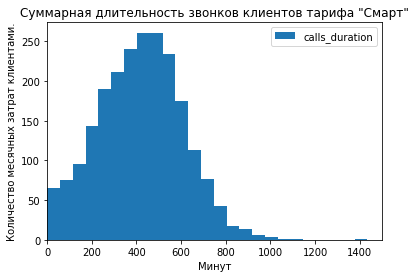

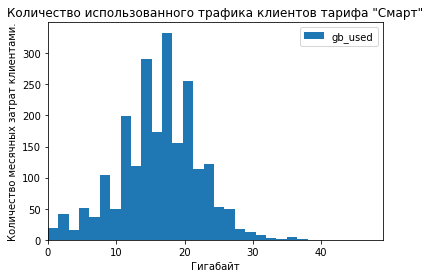

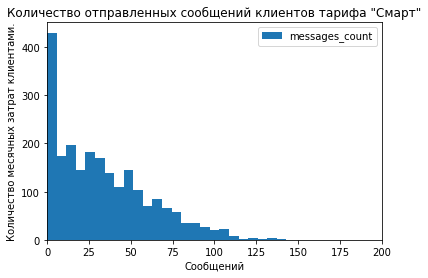

In [24]:
smart_users.plot(title = 'Суммарная длительность звонков клиентов тарифа "Смарт"', kind = 'hist', y = 'calls_duration', bins = 25, xlim = (0, 1500))
plt.xlabel("Минут")
plt.ylabel("Количество месячных затрат клиентами.")
smart_users.plot(title = 'Количество использованного трафика клиентов тарифа "Смарт"', kind = 'hist', y = 'gb_used', bins = 25, xlim = (0, 49))
plt.xlabel("Гигабайт")
plt.ylabel("Количество месячных затрат клиентами.")
smart_users.plot(title = 'Количество отправленных сообщений клиентов тарифа "Смарт"', kind = 'hist', y = 'messages_count', bins = 25, xlim = (0, 200))
plt.xlabel("Сообщений")
plt.ylabel("Количество месячных затрат клиентами.")

### Анализ тарифа "Ультра" 

In [25]:
ultra_users.describe()

,user_id,month,calls_count,calls_duration,gb_used,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,19.494416,49.363452,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.152284
std,140.694908,2.871762,43.916853,317.606098,9.853511,47.804457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,12.000000,6.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,19.000000,38.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,104.000000,752.000000,27.000000,79.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,49.000000,224.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


Text(0, 0.5, 'Количество месячных затрат клиентами.')

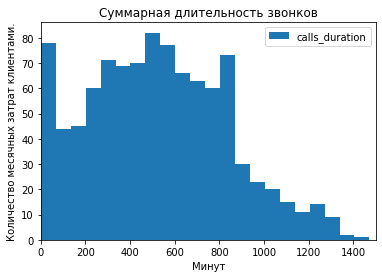

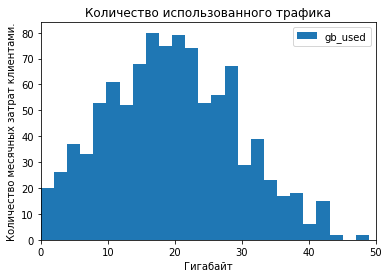

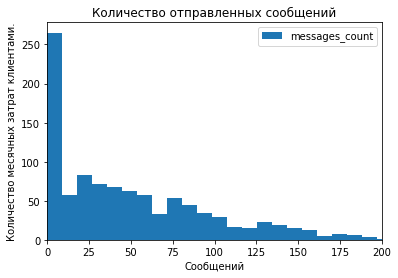

In [26]:
ultra_users.plot(title = 'Суммарная длительность звонков', kind = 'hist', y = 'calls_duration', bins = 25, xlim = (0,1500))
plt.xlabel("Минут")
plt.ylabel("Количество месячных затрат клиентами.")
ultra_users.plot(title = 'Количество использованного трафика', kind = 'hist', y = 'gb_used', bins = 25, xlim = (0,50))
plt.xlabel("Гигабайт")
plt.ylabel("Количество месячных затрат клиентами.")
ultra_users.plot(title = 'Количество отправленных сообщений', kind = 'hist', y = 'messages_count', bins = 25, xlim = (0, 200))
plt.xlabel("Сообщений")
plt.ylabel("Количество месячных затрат клиентами.")

Исходя из этих графиков видно, что скорее всего пользователи тарифа смарт используют больше трафика, звонков и смс. Также заметно, что Очень большое количество клиентов практически не использует смс сообщения. Это может навести нас на мысль, что многим практически не нужны смс, а это повод подумать над созданием тарифа учитывающего эту особенность потребителей.

In [27]:
#Используем ddof = 1, так как работаем с выборкой, а не со всей совокупностью.
#Тут собираем среднее, дисперсию и стандартное отклонение в словарь.
def get_stat(DataFrame):
    stat = {}
    stat['calls_mean'] = DataFrame['calls_duration'].mean()
    stat['gb_mean'] = DataFrame['gb_used'].mean()
    stat['messages_mean'] = DataFrame['messages_count'].mean()
    stat['calls_var'] = np.var(DataFrame['calls_duration'], ddof = 1)
    stat['gb_var'] = np.var(DataFrame['gb_used'], ddof = 1)
    stat['messages_var'] = np.var(DataFrame['messages_count'], ddof = 1)
    stat['calls_std'] = np.std(DataFrame['calls_duration'], ddof = 1)
    stat['gb_std'] = np.std(DataFrame['gb_used'], ddof = 1)
    stat['messages_std'] = np.std(DataFrame['messages_count'], ddof = 1)
    return stat

In [28]:
smart_stat = get_stat(smart_users)
ultra_stat = get_stat(ultra_users)
smart_stat

{'calls_mean': 417.9349484073576,
 'gb_mean': 16.328847016599372,
 'messages_mean': 33.384028712427096,
 'calls_var': 36219.31578434428,
 'gb_var': 33.02870517811161,
 'messages_var': 796.8129584480083,
 'calls_std': 190.31372988921288,
 'gb_std': 5.7470605685090534,
 'messages_std': 28.22787555676141}

In [29]:
ultra_stat

{'calls_mean': 526.6233502538071,
 'gb_mean': 19.494416243654822,
 'messages_mean': 49.36345177664975,
 'calls_var': 100873.63339730098,
 'gb_var': 97.09168626965459,
 'messages_var': 2285.266142544674,
 'calls_std': 317.6060978591264,
 'gb_std': 9.853511367510293,
 'messages_std': 47.80445735017472}

In [30]:
def three_sigm(mean, std):
    print("Значения находятся между:", round(positive_value(mean-3*std), 2), "и", round((mean+3*std), 2))

In [31]:
def three_sigm_stat(dictionary):
    print('Для звонков:')
    three_sigm(dictionary['calls_mean'],dictionary['calls_std'])
    print('Для использованного трафика:')
    three_sigm(dictionary['gb_mean'],dictionary['gb_std'])
    print('Для количества сообщений:')
    three_sigm(dictionary['messages_mean'],dictionary['messages_std'])

In [32]:
print("Для пользователей тарифа ультра:")
three_sigm_stat(ultra_stat)
print("Для пользователей тарифа смарт:")
three_sigm_stat(smart_stat)
    

Для пользователей тарифа ультра:
Для звонков:
Значения находятся между: 0 и 1479.44
Для использованного трафика:
Значения находятся между: 0 и 49.05
Для количества сообщений:
Значения находятся между: 0 и 192.78
Для пользователей тарифа смарт:
Для звонков:
Значения находятся между: 0 и 988.88
Для использованного трафика:
Значения находятся между: 0 и 33.57
Для количества сообщений:
Значения находятся между: 0 и 118.07


In [33]:
print('Суммарная выручка за клиентов тарифа "Смарт:"', 2229 * 1289.973531)
print('Суммарная выручка за клиентов тарифа "Ультра:"', 985 * 2070.152284)

Суммарная выручка за клиентов тарифа "Смарт:" 2875351.000599
Суммарная выручка за клиентов тарифа "Ультра:" 2039099.9997399999


***Вывод:***

Теперь мы знаем, что клиенты пользующиеся тарифом ультра в среднем используют больше трафика, сообщений и звонков, чем пользователи тарифа смарт. Также графики количества сообщений и потребления интернет-трафика имеют биномиальное распределение, а график сообщений распределение Пуассона. Это даёт нам определённую уверенность, что данные верны. Также мы посчитали дисперсию и стандартное отклонение, по которым можем сказать, что по правилу трёх сигм пользователям тарифа ультра не нужно больше, чем 1500 минут разговора в 99% случаев. Интернет трафик нужен и его практически столько, сколько надо. Сообщений таже не нужно больше 200. Это говорит нам о том, что этот тариф можно и нужно переработать для клиентов, так как им не нужны лишние смс и звонки. С тарифом смарт ситация обратная им нехватает трафика, звонков и смс. Это говорит нам о том, что тариф "Ультра" даёт людям слишком много всего, а тариф "Смарт слишком мало". Возможно компании стоит задуматься о создании тарифа, который будет чем-то средним между тарифами "Смарт" и "Ультра". Также мы выяснили, что в среднем пользователи тарифа "Ультра" тратят больше денег, однако суммарная выручка с пользователей тарифа "Смарт" больше примерно на 40%.

## Построение и проверка гипотез

### Проверка гипотезы: "Пользователи тарифа "Смарт" приносят в меньше выручки, чем пользователи тарифа "Ультра""

Нулевая гипотеза - пользователи обоих тарифов платят одинаковое количество денег в месяц. Критерий - ежемесячный платёж, так как нас не интересует в данный момент, как именно клиенты тратят свои деньги. Нас интересует, сколько они тратят.

Альтернативная гипотеза: пользователи разных тарифов приносят разное количество выручки в месяц.

In [34]:
alpha = .05
result = st.ttest_ind(smart_users['revenue'], ultra_users['revenue'])
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


***Вывод:***

Мы отвергли нулевую гипотезу. Это даёт нам знать, что пользователи разных тарифов платят разные суммы в месяц. А так как средняя месячная оплата у пользователей тарифа "Ультра" выше, то можем сказать, что выручка от пользователей тарифа "Ультра" выше. Что довольно логично.

### Проверка гипотезы: "Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов"

Нулевая гипотеза - пользователи из Москвы платят столько, сколько и все остальные. Критерий остаётся аналогичным.

Альтернативная гипотеза: выручка пользователя из Москвы отличается от выручк пользователей других регионов.

In [35]:
Moscow_users = users_pivot_table.query("city == 'Москва'")
Other_users = users_pivot_table.query("city != 'Москва'") 
result = st.ttest_ind(Moscow_users['revenue'], Other_users['revenue'])
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [36]:
print(Moscow_users['revenue'].mean())
print(Other_users['revenue'].mean())

1546.7135842880523
1524.9362274298885


***Вывод***

В этот раз у нас не получилось отвергнуть нулевую гипотезу, а если посмотреть на pvalue, то мы видим, что оно большое - 0.54, поэтому делаем вывод, что скорее всего пользователи из Москвы в среднем платять столько же, сколько и остальные клиенты.

## Сравнение динамики суммарной месячной выручки

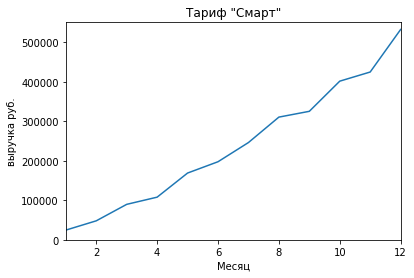

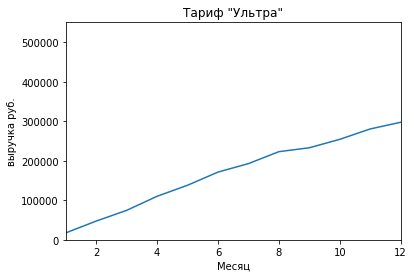

In [37]:
smart_users.groupby(by = 'month')['revenue'].sum().plot(title = 'Тариф "Смарт"', ylim = (0, 550000))
plt.xlabel('Месяц')
plt.ylabel('выручка руб.')
plt.show()
ultra_users.groupby(by = 'month')['revenue'].sum().plot(title = 'Тариф "Ультра"', ylim = (0, 550000))
plt.xlabel('Месяц')
plt.ylabel('выручка руб.')
plt.show()


## Общий вывод

Исходя из нашей выборки мы узнали следующее: ежемесячный платёж не зависит от того проживает клиент в Москве или нет; пользователи тарифа "Ультра" платят в среднем больше, чем пользователи тарифа "Смарт". В среднем клиентам, у которых тариф "Смарт" не хватает встроенных пакетов, однако не настолько, чтобы переходить на тариф "Ультра", ни один клиент не использовал пакеты тарифа "Ультра" полностью. Это надвигает на мысль, что нужен промежуточный тариф, в средней ценовой категории. Также мы заметили, что многие люди вообще не пользуются смс, это тоже стоит учитывать при создании новых тарифов или изменении старых. Проверив годовую динамику суммарной выручки тарифов "Смарт" и "Ультра" мы выяснили, что пользователи тарифа "Смарт" не только принесли большую сумммарную выручку, но и динамика этой выручки выглядит гораздо лучше. Если график динамики тарифа "Ультра" похож на график x^(1/2), то график тарифа "Смарт" похож на график x^2. Поэтому мы видим, что люди предпочитают этот тариф и скорее всего вложение в его рекламу принесёт большие выручки, так как судя по динамике этот тариф более перспективный. 